In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as const
import seaborn as sns

In [2]:
%matplotlib notebook

In [3]:
def Create_dataframes(filenames, directory, row_label):
    dataframes = {}
    for name in filenames:
        file_directory = f'{directory}/{name}.csv'
        data = pd.read_csv(file_directory, index_col=row_label)
        dataframes[name] = data
    return dataframes

def Ensure_all(All_variables):
    no_nan_tables = [table.dropna() for table in All_variables]
    
    num_variables = len(no_nan_tables)
    previous_merge = no_nan_tables[0]
    for index in range(1, num_variables):
        current_table = no_nan_tables[index]
        previous_merge = pd.merge(previous_merge, current_table, left_index=True, right_index=True, how='inner')
    return previous_merge

def Remove_rejects(All_variables, rejected_IDs):
    for variable_table in All_variables:
            variable_table.drop(rejected_IDs, inplace=True)
            
def Create_HR(dataframes, Teff_source, Rad_source):
    Teff_dataframe = dataframes[Teff_source]['Teff']
    Radius_dataframe = dataframes[Rad_source]['Radius']
    
    Total_data = [Teff_dataframe, Radius_dataframe]
    Filtered_data = Ensure_all(Total_data)
    Teff = Filtered_data['Teff']
    Radius = Filtered_data['Radius']
    
    Luminosity = Radius**2*(Teff/5772)**4
    return Teff, Luminosity

def Create_valley(starframes, planetframes, P_source, PSR_source, Host_radii_source):
    P_data = planetframes[P_source]['P']
    PSR_data = planetframes[PSR_source][['PSR','Host Gaia DR3 ID']]
    
    Planet_data = [P_data, PSR_data]
    Planet_dataframe = Ensure_all(Planet_data).set_index('Host Gaia DR3 ID')
    
    Host_Radii_dataframe = starframes[Host_radii_source]['Radius']
    
    Total_data = [Planet_dataframe, Host_Radii_dataframe]
    Filtered_data = Ensure_all(Total_data)
    
    P = Filtered_data['P']
    PSR = Filtered_data['PSR']
    Host_Radii = Filtered_data['Radius']
    
    Sun_Earth = const.R_sun/const.R_earth
    Planet_Radii = PSR*Host_Radii*Sun_Earth
    
    return P, Planet_Radii

In [4]:
Main_directory = 'C:/Users/Iwan/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets'
All_stars_directory = f'{Main_directory}/Sorted Data/Stars'
All_planets_directory = f'{Main_directory}/Sorted Data/Planets'

star_filenames = ['Gaia All Stars', 'Exo All Stars', 'Fulton All Stars', 'VanEylen All Stars', 'BASTA All Stars']
planet_filenames = ['VanHo All Planets', 'Fulton All Planets', 'VanEylen All Planets']

starframes = Create_dataframes(star_filenames, All_stars_directory, 'Gaia DR3 ID')
planetframes = Create_dataframes(planet_filenames, All_planets_directory, 'KOI')

<IPython.core.display.Javascript object>


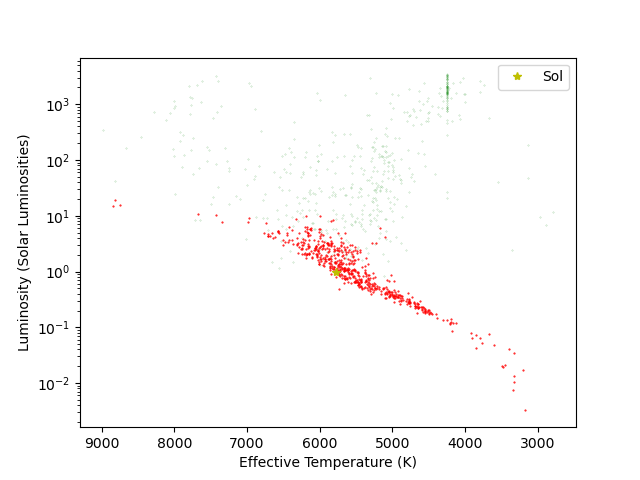

In [52]:
Dataset1 = 'Gaia All Stars'
Dataset2 = 'Gaia All Stars'

Teff, Luminosity = Create_HR(starframes, Dataset1, Dataset2)

HR_data = pd.read_csv(f'{Main_directory}/Raw Data/HR Data (Flags).csv')
def Gaia_flag(flag, wanted_flag):
    if flag != wanted_flag:
        flag = None
    return flag

HR_data['flags_flame'] = HR_data['flags_flame'].apply(Gaia_flag, args=[2])
HR_data.dropna(inplace=True)

plt.figure()
plt.plot(HR_data['teff_gspspec'], HR_data['lum_flame'], '.g', markersize=0.5, alpha=0.4)
plt.plot(Teff, Luminosity, 'r.', markersize=1)
plt.plot(5772, 1, 'y*', label='Sol')
plt.ylabel('Luminosity (Solar Luminosities)')
plt.xlabel('Effective Temperature (K)')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [ ]:
P_dataset = 'VanHo All Planets'
PSR_dataset = 'VanHo All Planets'
Host_dataset = 'Gaia All Stars'

P, Planet_Radii = Create_valley(starframes, planetframes, P_dataset, PSR_dataset, Host_dataset)

plt.figure()
plt.plot(P, Planet_Radii, 'r.', markersize=2)
#plt.plot(365, 1, 'b.', label='Earth')
plt.xscale('log')
plt.xlabel('Period (Days)')
plt.ylabel('Planet Radius (Earth Radii)')
#plt.legend()
plt.show()